In [1]:
import json 
from algorithm.sampler.buffer import TrainingSet
from algorithm.learner.ppo_learner import PPO_Learner
from algorithm.sampler.Coordinator import Coordinator


/home/jijingtian/anaconda3/envs/mas/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
with open("configs/toy_configs.json","r") as f:
    configs = json.load(f)

buffer = TrainingSet(configs)
learner = PPO_Learner(configs,buffer)
learner.save_model()
sampler = Coordinator(configs,buffer,eval_model = False)

In [ ]:
print(buffer.len())
sampler.collect_training_data()
print(buffer.len())

## MORL Envs

In [2]:
factors = Factor_dictionary[env_id]
Sampler = Factor_Sampler(factors)
weights,styles = Sampler.generate_reward_factors(10)
env_list = []
for i,weight in enumerate(weights):
    env_list.append(make_styled_env(env_id,0,weight))
envs = gym.vector.SyncVectorEnv(env_list)
envs = gym.wrappers.RecordEpisodeStatistics(envs)

obs,_ = envs.reset()
for _ in range(1000):
    action = envs.action_space.sample()
    next_obs, reward, done,truncted, info = envs.step(action)

    if "episode" in info.keys():
        for i,terminate in enumerate(info['_episode']):
            if terminate:
                print(info)

{'final_observation': array([array([ -0.14211618,   0.11360194,   0.17977682,  -0.11642895,
                0.02698893,  -0.48747972,  -0.39758181,  -0.08912417,
                1.33485121,   0.61449361,   3.05117165,  10.35204851,
              -15.92213979,  -7.10423521,  -1.96320507,   0.54830607,
               -2.08307621])                                         ,
       array([-0.07173897, -0.12295749,  0.04999298,  0.27900688,  0.17480887,
               0.49668649,  0.24154926, -0.0561754 ,  1.00836011, -0.35899224,
              -2.05499719, 11.45151979, -1.52615892, -1.37491694,  1.76972445,
               6.17951834, -9.4706871 ])                                      ,
       array([-0.14016181,  0.24391258,  0.2871841 , -0.41434363,  0.19632545,
              -0.49095908, -0.12737058, -0.53888878, -0.06265176,  0.77172638,
               1.57093589,  2.71457045, -4.6906784 , -2.55151801, -1.3875659 ,
              -1.66780925,  1.25780603])                                 

In [9]:
data_dict = np.load("logs/deep-sea-treasure-v0_SamplerTest/sampler_debug.npz")

In [10]:
data_dict.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fb93d7b4048>)

In [12]:
data_dict['sample_tis']

KeyError: 'sample_tis is not a file in the archive'

# Debugs

In [2]:
from algorithm.utils import hypervolume,sparsity ,non_dominated_sort

In [3]:
points = np.random.rand(100,1)
points = [np.cos(points),np.sin(points)]
points = np.concatenate(points,axis=-1)
points = points + np.random.rand(100,2) * 0.1

points2 = np.random.rand(100,1)
points2 = [np.cos(points2),np.sin(points)]
points2 = np.concatenate(points2,axis=-1)
points2 = points2 + np.random.rand(100,2) * 0.1
points3 = []
for i in range(100):
    point = points2[i]
    points3.append([i,i])

In [4]:
rank,rank_dict = non_dominated_sort(points)
front = points[rank_dict[1]]

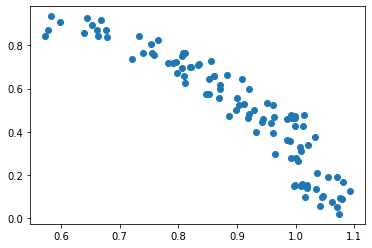

In [5]:
plt.scatter(points[:,0],points[:,1])


In [6]:
sparsity(front=front)

(21, 2)


0.004041377675966422